# Features Engineering - Transformation

Before extracting features or building models, it's often beneficial to **transform raw price data** to make it more stable, normalized, or informative. These transformations are not indicators in themselves, but rather **tools that reshape the data**, allowing for better analysis, feature engineering, and model performance.

**Tips: These transformations can be especially useful when applied as preprocessing steps before building indicators, machine learning features, or trading signals.**

In [1]:
# Import the Features Engineering Package from Quantreo
import quantreo.features_engineering as fe

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## **Fisher Transform**

The `fisher_transform` function applies a mathematical transformation that converts **non-Gaussian price data into a distribution resembling a normal curve**.

This is particularly useful for **highlighting turning points**, because values tend to cluster near the center and **amplify at the extremes** (±2 or more), making overbought and oversold conditions easier to detect.

The formula is:

$$
x_t = \frac{2 \cdot \left( \text{median}_t - \min_t \right)}{\max_t - \min_t} - 1
\quad \Rightarrow \quad
\text{Fisher}_t = 0.5 \cdot \ln\left( \frac{1 + x_t}{1 - x_t} \right)
$$
- `x_t` is a normalized representation of the price at time `t`, scaled between -1 and 1.
- The Fisher Transform **amplifies edge behavior**, making it a good signal enhancer.


In [3]:
df["fisher"] = fe.transformation.fisher_transform(df=df, high_col="high", low_col="low", window_size=20)
df["fisher"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00   -0.668801
2016-12-30 08:00:00   -0.743482
2016-12-30 12:00:00   -1.010736
2016-12-30 16:00:00   -0.989038
2016-12-30 20:00:00   -1.199386
Name: fisher, Length: 1548, dtype: float64

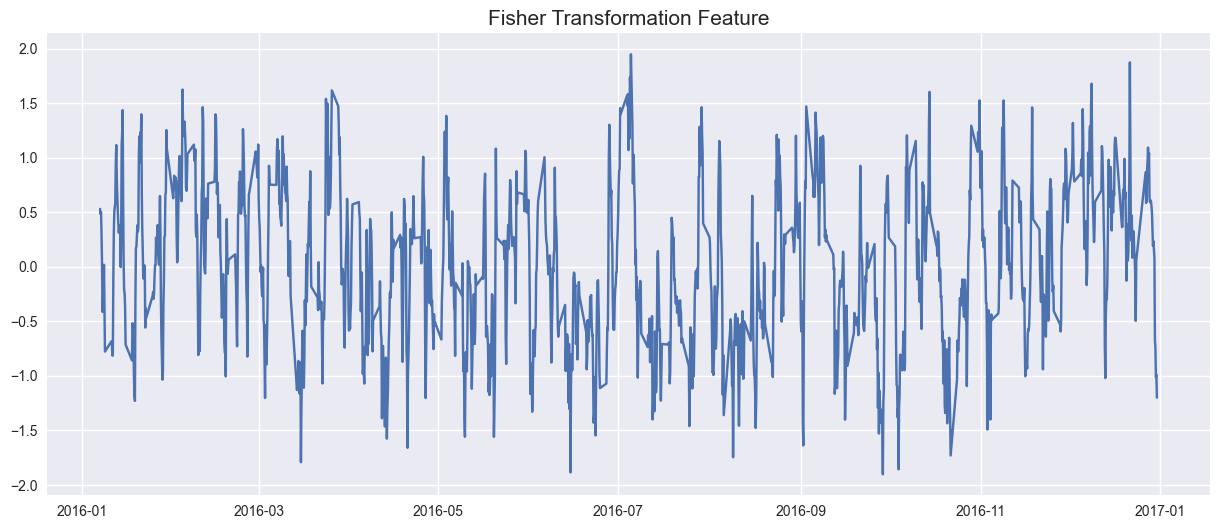

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df["fisher"])
plt.title("Fisher Transformation Feature", size=15)
plt.show()

<br>

## **Savitzky-Golay Filter**

The `savgol_filter` function applies a **causal version of the Savitzky-Golay filter** to a time series.

This transformation fits a **polynomial of order `k`** over a **rolling window** of past values and evaluates the value of that polynomial at the **last point** of the window. It is widely used to **smooth noisy signals** while preserving **local structure** like peaks and inflection points.

<br>

**Warning "Causal vs Standard Savitzky-Golay"**

>This implementation differs from the classic `scipy.signal.savgol_filter`, which applies a **centered filter** that includes both past and >future values — causing **look-ahead bias** in real-time trading.

>Here, the filter is applied in a **rolling**, meaning it only uses **past observations** within the window.  
>This makes it **safe for backtesting and live usage**, while preserving most of the smoothing benefits of the standard version.


In [5]:
df["savgol"] = fe.transformation.savgol_filter(df=df, col="close", window_size=21, polyorder=2)
df["savgol"]

time
2016-01-04 00:00:00           NaN
2016-01-04 04:00:00           NaN
2016-01-04 08:00:00           NaN
2016-01-04 12:00:00           NaN
2016-01-04 16:00:00           NaN
                          ...    
2016-12-30 04:00:00    103.401992
2016-12-30 08:00:00    103.409066
2016-12-30 12:00:00    103.421625
2016-12-30 16:00:00    103.354999
2016-12-30 20:00:00    103.266365
Name: savgol, Length: 1548, dtype: float64

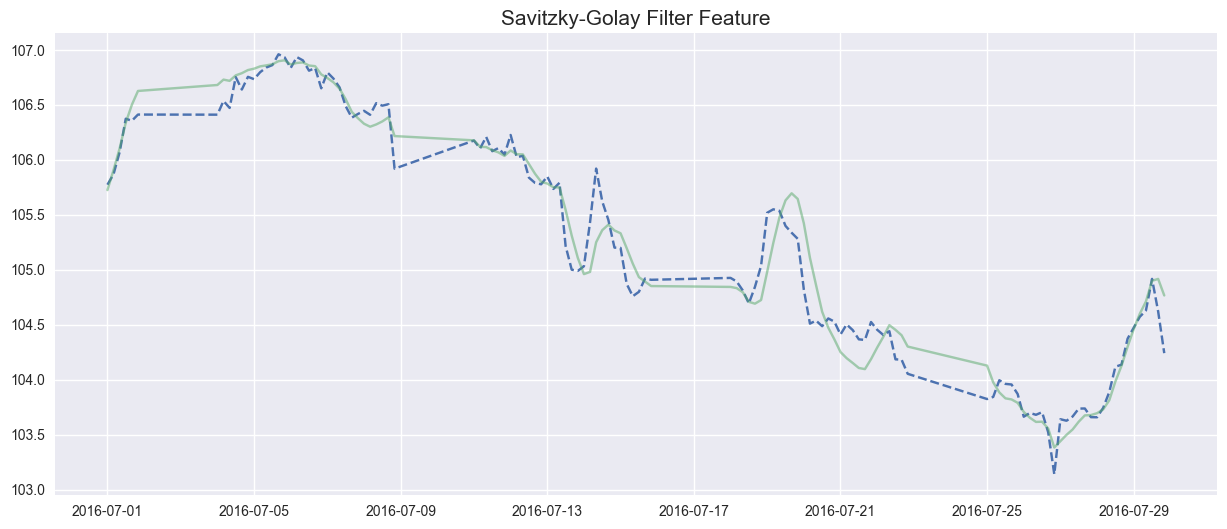

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df["close"].loc["2016-07"], "--")
plt.plot(df["savgol"].loc["2016-07"], alpha=0.5)

plt.title("Savitzky-Golay Filter Feature", size=15)
plt.show()